# Quem sobrevive ao desastre do Titanic?

(Competição da plataforma [Kaggle](https://www.kaggle.com/c/titanic/))

In [1]:
# importando pacotes necessários para visualização da árvore de decisão
from IPython.display import HTML
style = "<style>svg{width:50% !important;height:50% !important;}</style>"
HTML(style)
from IPython.display import SVG
from IPython.display import display
from graphviz import Source

# importando pacotes python
import os  # ferramentas para acessar funcionalidades dependentes de Sistema Operacional 
import pandas as pd  # ferramentas para manipulação e análise de dados
from sklearn.tree import DecisionTreeClassifier  # treinamento de modelo baseado em árvore de decisão
from sklearn.tree import export_graphviz  # geração de visualização de árvore de decisão

# importando métodos próprios
import my_methods as utils

In [2]:
# cria um DataFrame a partir dos dados no arquivo train.csv
data = pd.read_csv(os.path.join('dados','train.csv'))

data.info()

data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


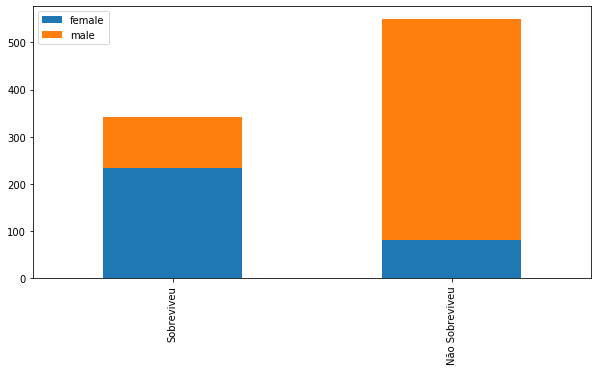

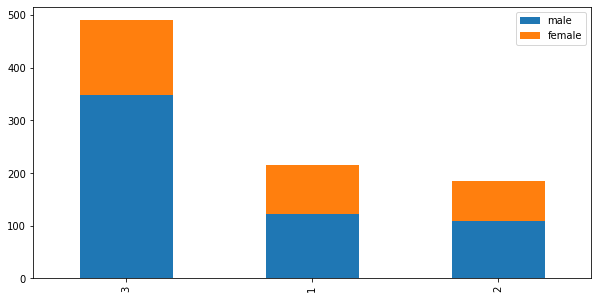

In [3]:
# gera e mostra gráfico de barras a projeção de uma coluna sobre o alvo ('Survived')
utils.bar_chart('Sex', data)

# atualização do método bar_chart: aceita uma segunda coluna para projeção, no lugar da coluna alvo
utils.bar_chart('Sex', data, 'Pclass')

In [4]:
# para usar DecisionTreeClassifier, precisamos que que os valores dos dados de treinamento sejam numéricos
# os valores das colunas 'Name', 'Sex', 'Ticket', 'Cabin' e 'Embarked' devem ser transformados em numérico, se
#   quisermos utilizá-los para treinamento

# cria coluna 'Sex_encoded' para salvar encoding dos valores de 'Sex' (não queremos perder os valores originais)
data['Sex_encoded'] = utils.encode_string('Sex', data)

data[['Sex', 'Sex_encoded']].head()

,Sex,Sex_encoded
0,male,1
1,female,0
2,female,0
3,female,0
4,male,1


In [5]:
# para usar DecisionTreeClassifier, precisamos que todos os valores de treinamento sejam não nulos
# as colunas 'Age', 'Cabin' e 'Embarked' possuem valores nulos

# substitui os valores nulos pela mediana da coluna (desde que seja numérica)
data = data.fillna(data.median())

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Sex_encoded  891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [6]:
# separação das colunas que serão utilizadas para treinamento

# train: dados de treinamento que servirão de entrada para o modelo
train = data[['Pclass', 'Sex_encoded','Age','SibSp', 'Parch', 'Fare']]
train.head()

,Pclass,Sex_encoded,Age,SibSp,Parch,Fare
0,3,1,22.0,1,0,7.2500
1,1,0,38.0,1,0,71.2833
2,3,0,26.0,0,0,7.9250
3,1,0,35.0,1,0,53.1000
4,3,1,35.0,0,0,8.0500


In [7]:
# target: dados de treinamento que servirão de saída para o modelo (alvo)
target = data[['Survived']]
target.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [8]:
# treinamento do modelo para classificar se uma pessoa sobrevive ou não ao desastre do Titanic
model = DecisionTreeClassifier()
model.fit(train, target)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [9]:
# queremos predizer se uma nova pessoa sobrevive ou não ao desastre do Titanic
new_person = pd.DataFrame(
    {'Pclass': [3], 
     'Sex_encoded': [1],  # 0 - female; 1 - male
     'Age': [22],
     'SibSp': [1], 
     'Parch': [0], 
     'Fare': [72500]})

predictions = model.predict(new_person)
# 0 - não sobrevive
# 1 - sobrevive

print('A pessoa {}sobrevive'.format('não ' if predictions[0] == 0 else ''))

A pessoa não sobrevive


In [10]:
# será que o modelo treinado é bom? Podemos avaliar a acurácia (quanto o modelo acerta) considerando o 
# conjunto de dados utilizado no treinamento.
test = train
predictions = model.predict(test)

test.head()

correct = sum(predictions.tolist() == target['Survived'])
accuracy = correct/len(predictions)*100

print('acurácia: {0:.2f}% ({1:}/{2:})'.format(accuracy, correct, len(predictions)))
# Idealmente, devemos avaliar outras métricas, como precisão e revocação, para ter uma visão mais geral da 
# qualidade do modelo. Também é interessante calcular as métricas de avaliação para um conjunto de dados que não
# foi utilizado no treinamento do modelo, assim teremos uma avaliação mais próxima do correto para dados que o 
# modelo nunca viu.

acurácia: 97.98% (873/891)


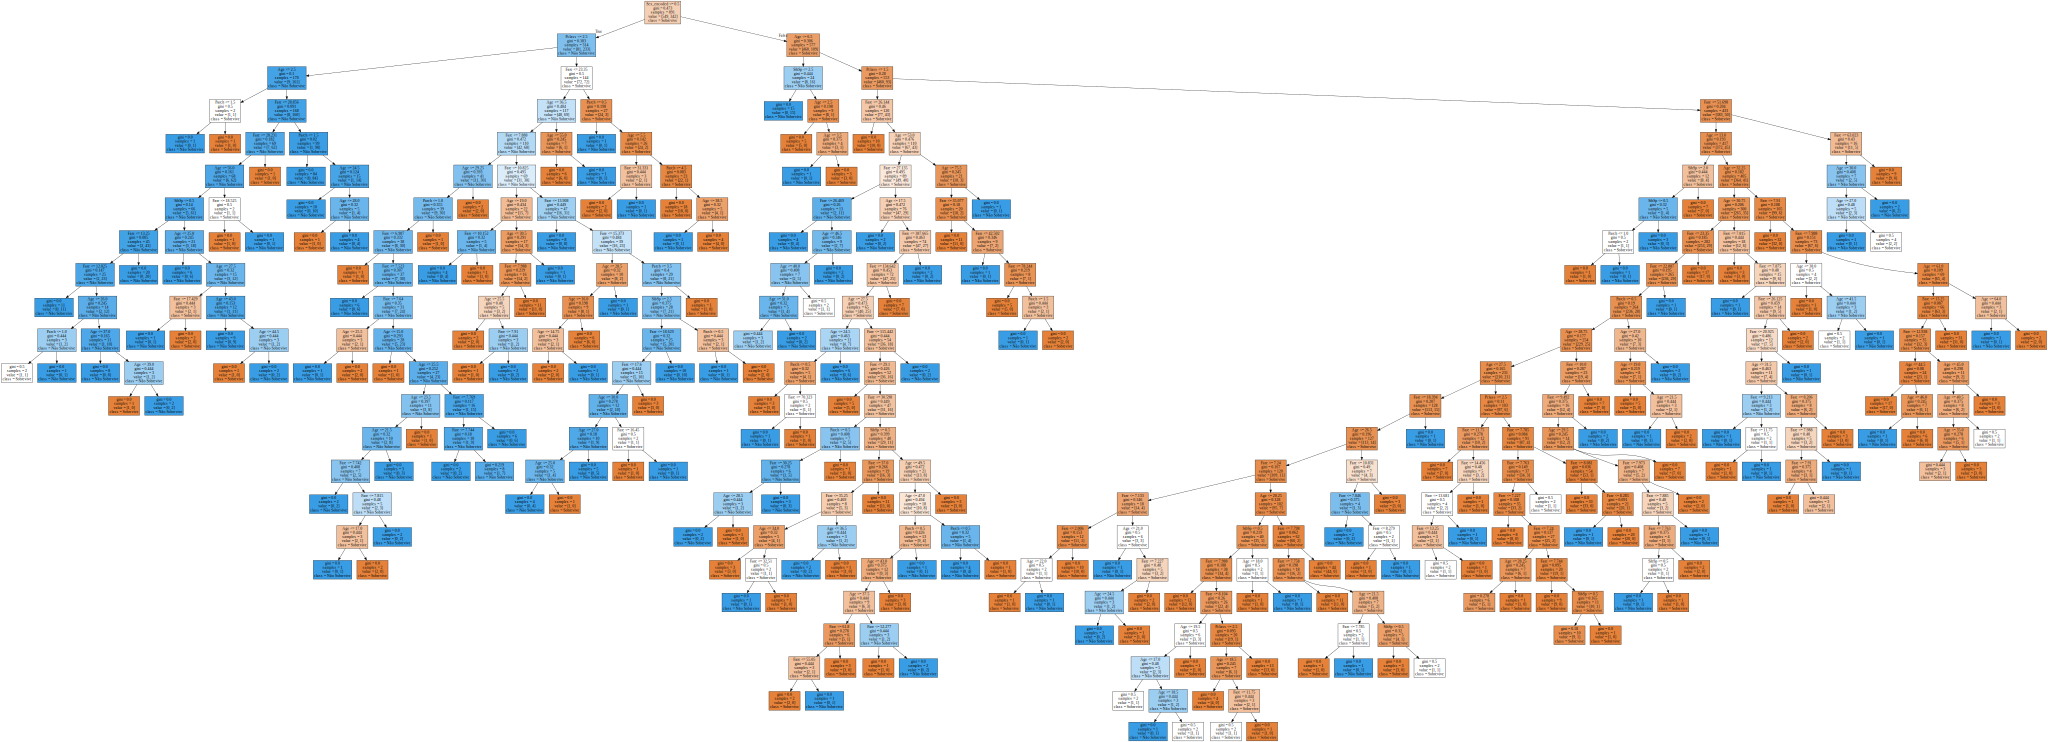

In [11]:
# Utilizamos para treinamento do modelo um algoritmo baseado em árvores de decisão. Modelos gerados por esse tipo
# de algoritmo podem ser visualizados graficamente e são interpretáveis (relativamente ao tamanho da árvore) para
# seres humanos, ou seja, em muitos casos um ser humano consegue entender pela análise da árvore como o modelo 
# chegou à predição.
graph = Source(export_graphviz(model, out_file=None, 
                                    feature_names=train.columns.values, 
                                    class_names=['Sobrevive', 'Não Sobrevive'], filled = True))

display(SVG(graph.pipe(format='svg')))